### QUESTIONS:
1. Predict whether or not a pokemon is a legendary by ulitizing the Total column. (k-Nearest Neighbor)
2. Predict the attack of a pokemon given its defense. (Linear Regression)

### CODE

In [34]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

The following code loads in the Pokemon CSV file and cleans up its data. The steps I have used to clean the data are to first fill in the Type 2 column blank values with "None" and then delete all rows with a missing value.

In [36]:
dataframe = pd.read_csv('Datasets/Pokemon.csv')
dataframe["Type 2"] = dataframe["Type 2"].fillna("None")
dataframe = dataframe.dropna(axis=0, inplace=False)
dataframe

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


##### CLASSIFICATION QUESTION (Prediction) 1
1. Predict whether or not a pokemon is a legendary by ulitizing the Total column. (k-Nearest Neighbor)

- Feature: *Total Column Variable* which is the sum of a specific Pokemon's HP, Attack, Defense, Sp. Attack, Sp. Defense, and Speed

- Dependent Variable: *Legendary* which is a boolean value determining whether or not the Pokemon is a legendary

In [37]:
x = dataframe[['Total']]
y = dataframe[['Legendary']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.33, random_state=42)

In [38]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train.values.ravel())
model.score(x_test, y_test)

0.9875

In [39]:
bool(model.predict([[690]])[0])

/workspaces/DataSciencePlayground/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


True

##### REGRESSION QUESTION (Prediction) 2
2. Predict the attack of a pokemon given its defense. (Linear Regression)

- Feature: *Defense* Stat of the Pokemon

- Dependent Variable: *Attack* Stat of the Pokemon

In [40]:
x = dataframe[['Defense']]
y = dataframe[['Attack']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.33, random_state=42)

In [41]:
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.16943119705422005

**Journal Entry:** The above was the standard code for my required Linear Regression model that analyzes the correlation between the defense and attack powers of Pokemon. Given that my r^2 value was absolutely horrendous (0.169), I wanted to visualize the dataset and look using my own human eyes to see if I could figure out what the correlation between the data would be (shown in the figure resulting from the code below). It looks very linear, but it can also be noted that there are still plenty of outliers. My next steps are to filter through the data even more and remove the outliers.

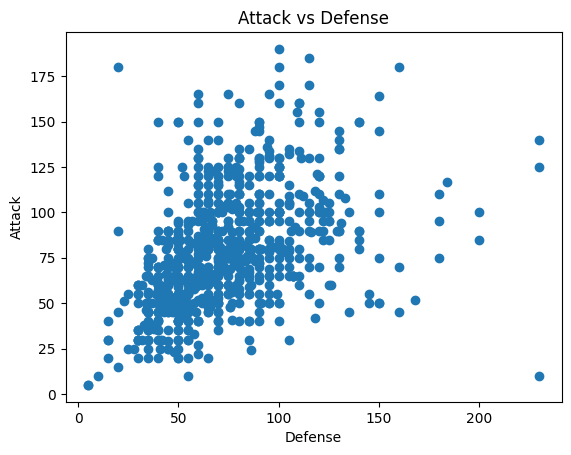

In [42]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, y)
ax.set_xlabel('Defense')
ax.set_ylabel('Attack')
ax.set_title('Attack vs Defense')
plt.show()

**Journal Entry:** The following is the newly evaluated code to remove the outliers and see what the result is.

In [68]:
Q1_def = dataframe['Defense'].quantile(0.25)
Q3_def = dataframe['Defense'].quantile(0.75)
IQR_def = Q3_def - Q1_def
lower_def = Q1_def - 1.5 * IQR_def
upper_def = Q3_def + 1.5 * IQR_def

Q1_att = dataframe['Attack'].quantile(0.25)
Q3_att = dataframe['Attack'].quantile(0.75)
IQR_att = Q3_att - Q1_att
lower_att = Q1_att - 1.5 * IQR_att
upper_att = Q3_att + 1.5 * IQR_att

dataframe_no_outliers = dataframe[
    (dataframe['Defense'] >= lower_def) & (dataframe['Defense'] <= upper_def) &
    (dataframe['Attack'] >= lower_att) & (dataframe['Attack'] <= upper_att)
]

In [69]:
x = dataframe_no_outliers[['Defense']]
y = dataframe_no_outliers[['Attack']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.33, random_state=42)

In [70]:
dataframe_no_outliers

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [71]:
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.2433682979994668

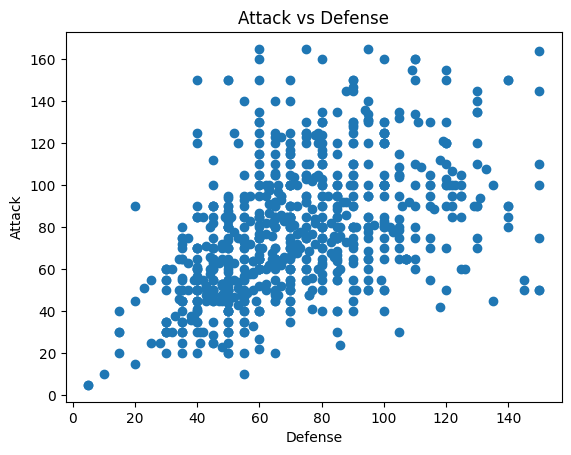

In [72]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, y)
ax.set_xlabel('Defense')
ax.set_ylabel('Attack')
ax.set_title('Attack vs Defense')
plt.show()